<a href="https://www.kaggle.com/code/subham28/heart-stroke-predictor?scriptVersionId=246119214" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv
/kaggle/input/heart-stroke/healthcare-dataset-stroke-data.csv


In [2]:
df=pd.read_csv("/kaggle/input/heart-stroke/healthcare-dataset-stroke-data.csv")

In [3]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2306,39956,Female,34.0,0,0,No,Private,Rural,87.21,38.4,Unknown,0
313,55232,Female,38.0,0,0,Yes,Private,Rural,79.83,27.9,smokes,0
1987,72311,Male,18.0,0,0,No,Private,Urban,113.24,24.9,Unknown,0
2949,59988,Female,26.0,1,0,Yes,Private,Urban,107.59,33.1,smokes,0
681,54182,Female,16.0,0,0,No,Private,Rural,74.98,21.4,never smoked,0
535,56998,Female,12.0,0,0,No,children,Urban,138.06,23.1,Unknown,0
2973,14928,Female,26.0,0,0,No,Private,Urban,81.94,26.0,smokes,0
210,33943,Female,39.0,0,0,Yes,Private,Urban,83.24,26.3,never smoked,1
333,1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
1048,49279,Male,57.0,0,1,Yes,Private,Urban,76.50,29.2,formerly smoked,0


In [4]:
df.drop(columns=['id','ever_married'],inplace=True)

In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.shape

(5110, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<Axes: xlabel='gender', ylabel='stroke'>

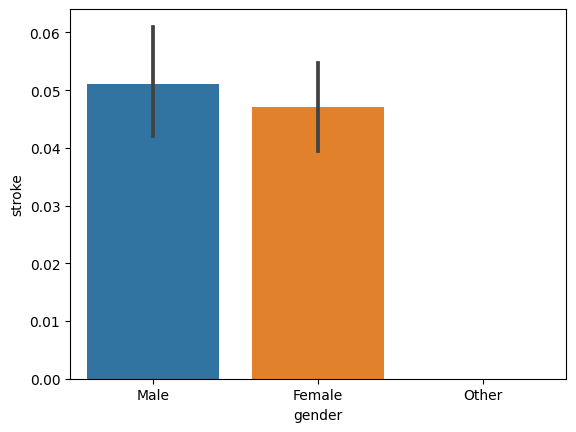

In [12]:
sns.barplot(x=df['gender'],y=df['stroke'])

<Axes: xlabel='gender', ylabel='stroke'>

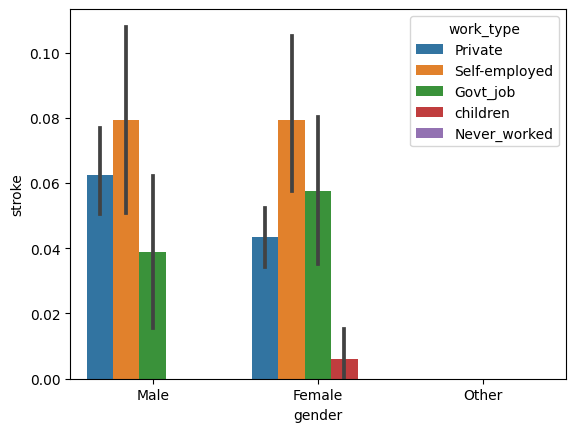

In [13]:
sns.barplot(x=df['gender'],y=df['stroke'],hue=df['work_type'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='stroke'>

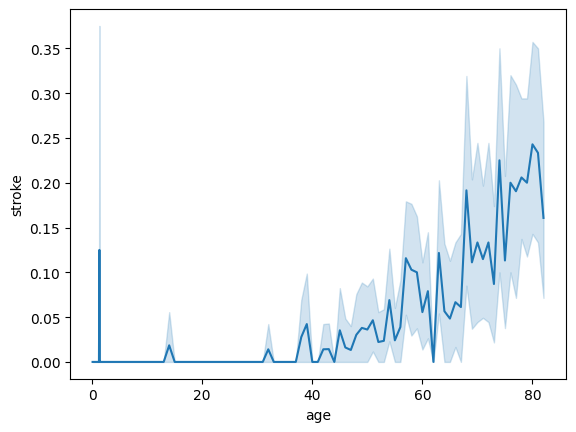

In [14]:
sns.lineplot(x=df['age'],y=df['stroke'])

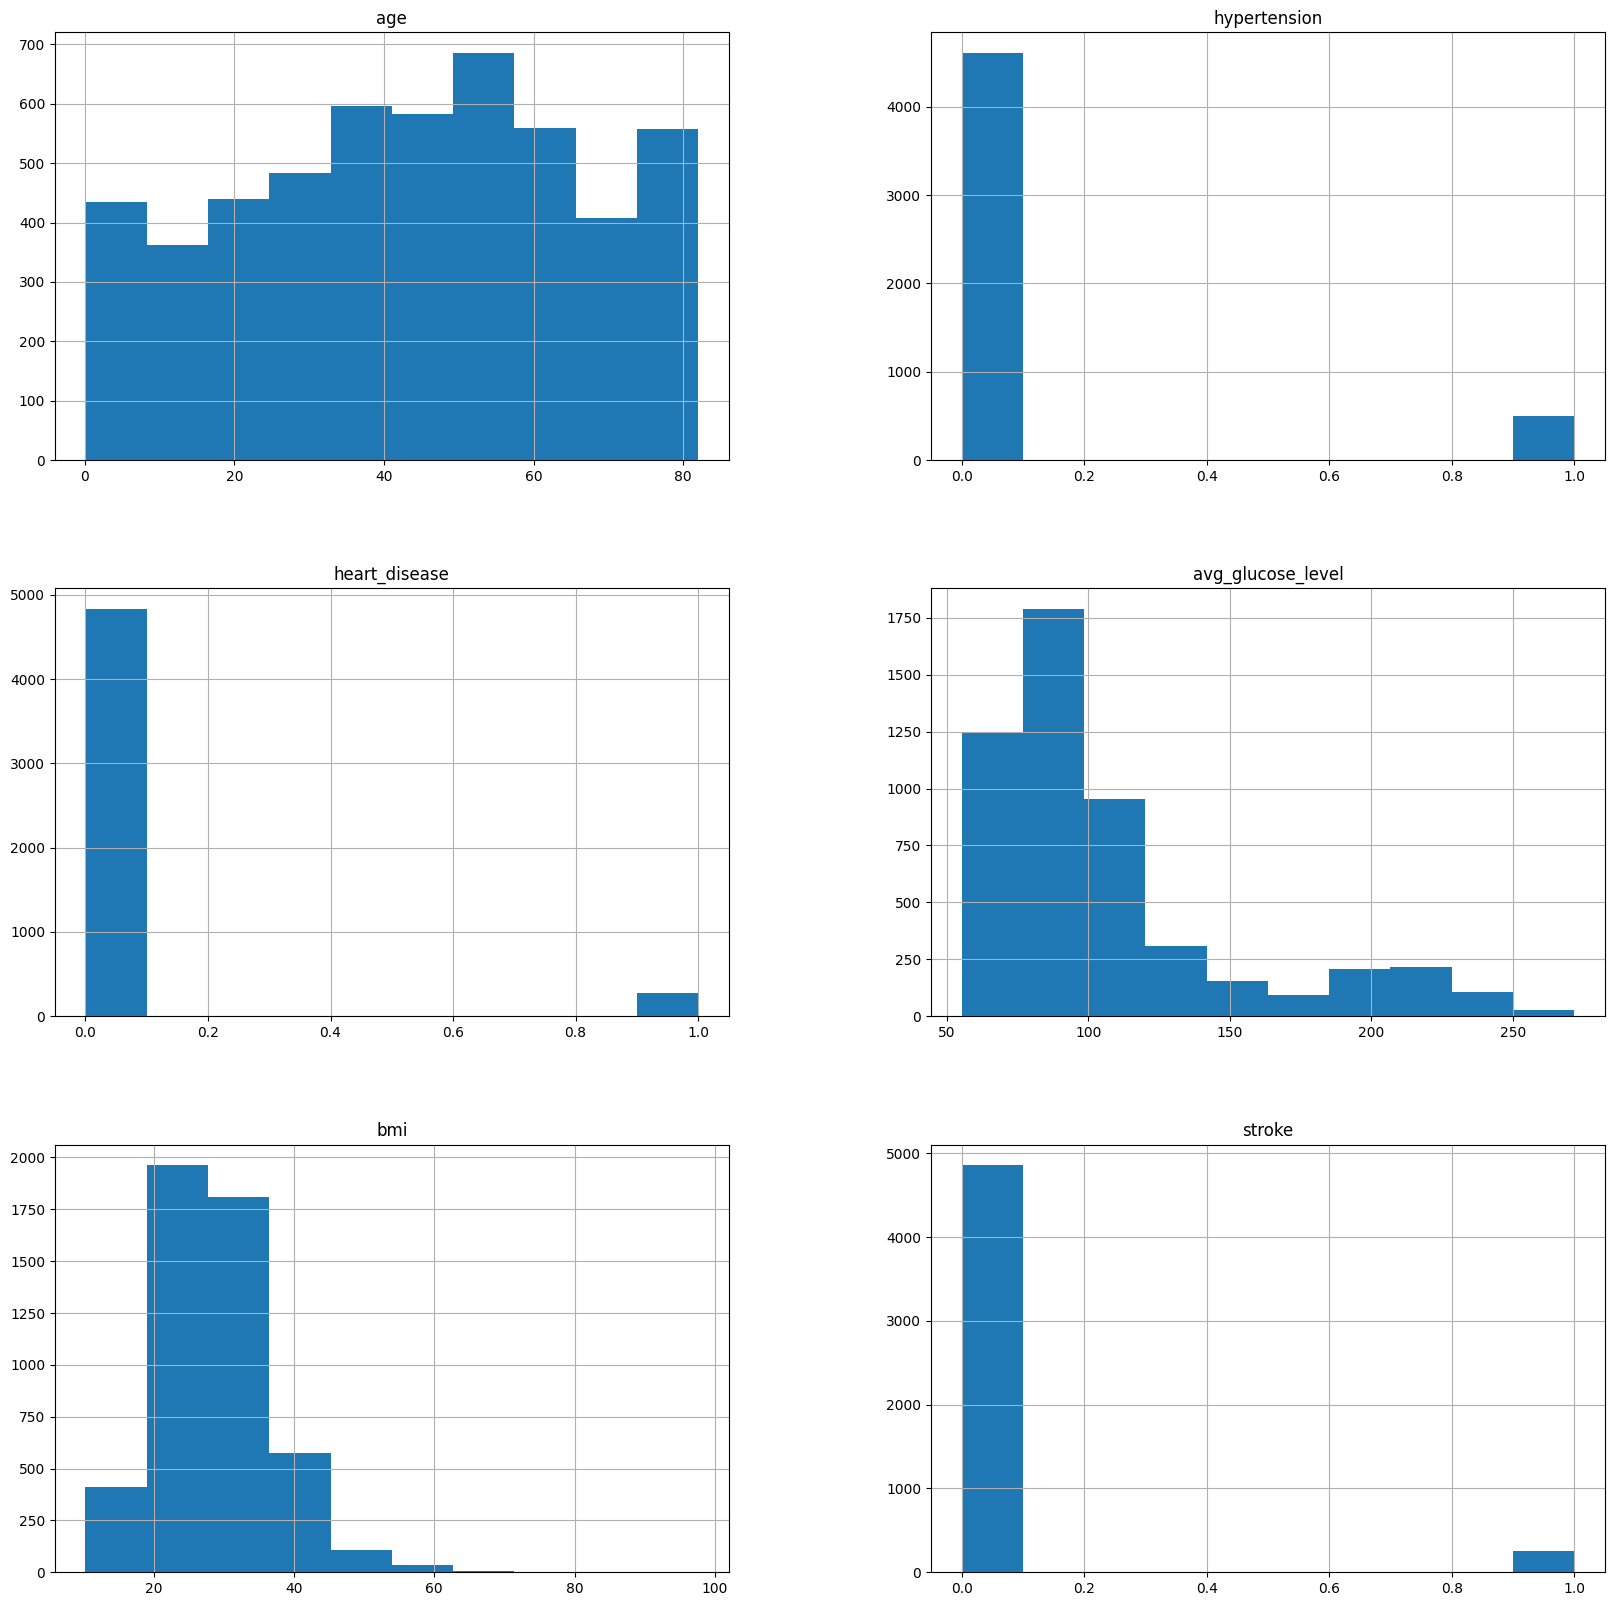

In [15]:
df.hist(figsize = (20, 20))
plt.show()

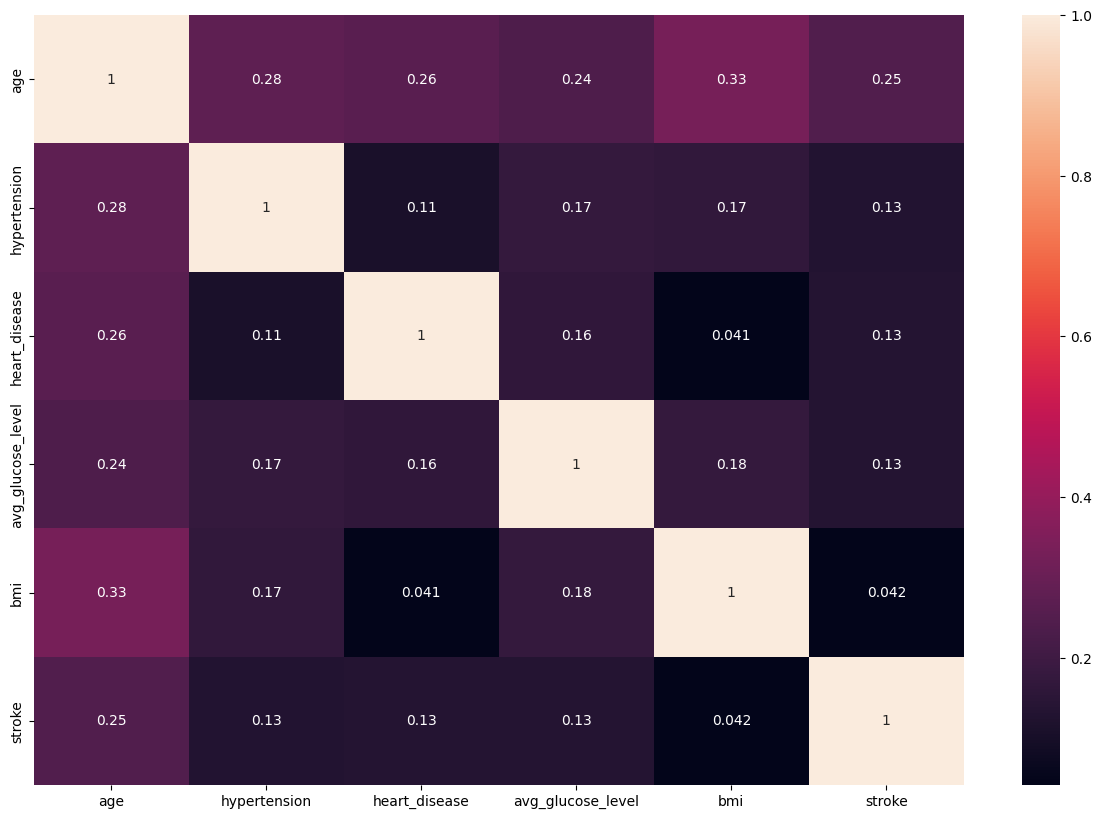

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

#### Filling Missing Values

In [17]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)  # Fill with mean

<ipython-input-18-bebe33ad653a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)  # Fill with mean


In [19]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### check outliers

<Axes: >

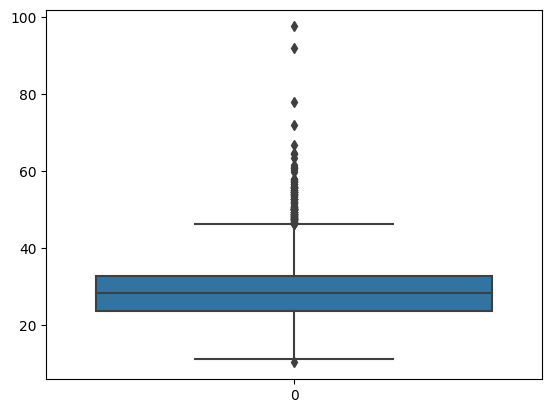

In [20]:
sns.boxplot(df['bmi'])

<Axes: xlabel='bmi'>

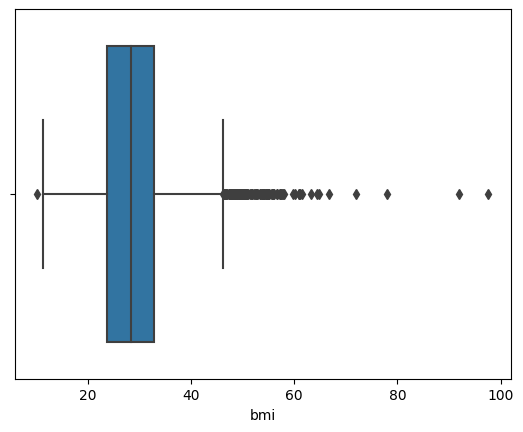

In [21]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='avg_glucose_level'>

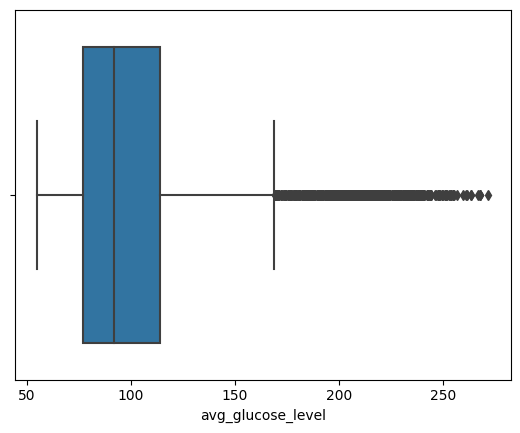

In [22]:
sns.boxplot(x=df['avg_glucose_level'])

#### Encoding

In [23]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked,1


#### gender,residence,smoking_status=ordinal  work_type=OHE

In [24]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

In [25]:
df.shape

(5109, 10)

In [26]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [27]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [28]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


column_transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=[
        ['Female', 'Male'],  # Gender order
        ['Rural', 'Urban'],  # Residence order
        ['Unknown','never smoked', 'formerly smoked', 'smokes']  # Smoking status order
    ]), ['gender', 'Residence_type', 'smoking_status']),
    
    ('onehot', OneHotEncoder(drop='first'), ['work_type'])
], remainder='passthrough')

In [30]:
transformed_data = column_transformer.fit_transform(df)


In [31]:
# Get correct column names
column_names = column_transformer.get_feature_names_out()

# Convert transformed data to DataFrame with correct column names
df_transformed = pd.DataFrame(transformed_data, columns=column_names)



In [32]:
df_transformed.head()

,ordinal__gender,ordinal__Residence_type,ordinal__smoking_status,onehot__work_type_Never_worked,onehot__work_type_Private,onehot__work_type_Self-employed,onehot__work_type_children,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi,remainder__stroke
0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.600000,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,61.0,0.0,0.0,202.21,28.893237,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,80.0,0.0,1.0,105.92,32.500000,1.0
3,0.0,1.0,3.0,0.0,1.0,0.0,0.0,49.0,0.0,0.0,171.23,34.400000,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.000000,1.0


In [33]:
df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked,1


In [34]:
from sklearn.model_selection  import train_test_split
x = df_transformed.drop('remainder__stroke', axis=1)
y = df_transformed['remainder__stroke']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#### Train model

In [35]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

In [36]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [37]:
y_pred=rfc.predict(x_test)

In [38]:
accuracy_score(y_pred,y_test)

0.9562948467058056

In [39]:
print('Training Score: {}'.format(rfc.score(x_train, y_train)))
print('Test Score: {}'.format(rfc.score(x_test, y_test)))

Training Score: 0.9997203579418344
Test Score: 0.9562948467058056


In [40]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
print('Training Score: {}'.format(xgb_model.score(x_train, y_train)))

print('Test Score: {}'.format(xgb_model.score(x_test, y_test)))

Training Score: 0.9966442953020134
Test Score: 0.9465101108936725
